In [2]:
import numpy as np
import util

Crossfade [339225, 2334660) 1995435 samples; t=[7.0671875s, 48.63875s) 41.5715625s
block_size=2426244 samples; t=50.54675s


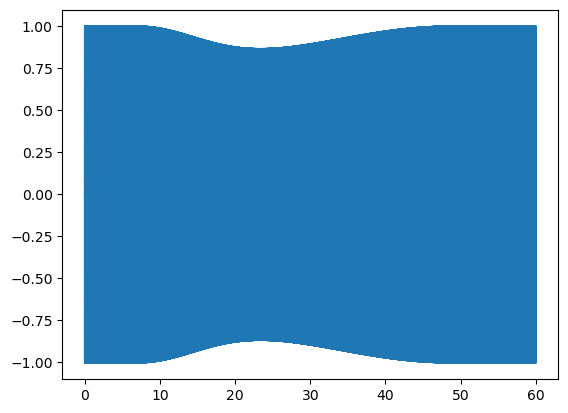

In [10]:
rnd = np.random.default_rng()

fs = 48000
T = 60
t = np.linspace(0, T, fs*T)

x = np.sin(2 * np.pi * 440 * t)
y = np.sin(2 * np.pi * 880 * t)

crossfade_start = rnd.integers(fs*T)
crossfade_end = rnd.integers(crossfade_start, fs*T)

print(f'Crossfade [{crossfade_start}, {crossfade_end}) {crossfade_end - crossfade_start} samples; t=[{1.0*crossfade_start/fs}s, {1.0*crossfade_end/fs}s) {(float(crossfade_end) - crossfade_start)/fs}s')
crossfader = util.Crossfader(crossfade_end - crossfade_start)

output = np.zeros_like(x)
output[:crossfade_start] = x[:crossfade_start]

done = False
block_start = crossfade_start
while not done:
    block_size = rnd.integers(block_start, fs*T)
    print(f'block_size={block_size} samples; t={block_size/fs}s')
    output[block_start:block_start + block_size], done = \
        crossfader.crossfade(x[block_start:block_start + block_size], 
                                y[block_start:block_start + block_size])
    block_start += block_size

if block_start < fs*T:
    output[block_start:] = y[block_start:]

import matplotlib.pyplot as plt
plt.plot(t, output)

import scipy

scipy.io.wavfile.write(f'crossfaded-{int(float(crossfade_start)/fs)}-{int(float(crossfade_end)/fs)}.wav', fs, output)
